## Arbitrary value imputation for categorical variables

This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.

This is in essence, the equivalent of replacing by an arbitrary value for numerical variables.

The beauty of this technique resides on the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)
- Captures the importance of "missingness" if there is one
- No assumption made on the data


### Limitations

- If the number of NA is small, creating an additional category may cause trees to over-fit

For categorical variables this is the method of choice, as it treats missing values as a separate category, without making any assumption on the variable or the reasons why data could be missing.

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import pylab
import scipy.stats as stats

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

# to split the datasets
from sklearn.model_selection import train_test_split

In [29]:
# let's load the car-data.csv dataset

data = pd.read_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\car-data.csv')


In [30]:
# let's inspect the first 5 rows
data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,16500.0
2,1,alfa-romero,gas,NaN,two,hatchback,rwd,front,94.5,16500.0
3,2,audi,gas,NaN,four,NaN,fwd,front,99.8,13950.0
4,2,audi,gas,NaN,four,sedan,4wd,front,99.4,17450.0


In [31]:
# let's look at the percentage of NA

data.isnull().mean()

symboling          0.000000
make               0.000000
fuel-type          0.000000
aspiration         0.175610
num-of-doors       0.000000
body-style         0.141463
drive-wheels       0.000000
engine-location    0.000000
wheel-base         0.000000
price              0.000000
dtype: float64

When replacing NA in categorical variables by a label called 'Missing', we are not learning anything from the training set, so in principle we could do this in the original dataset and then separate into train and test. However, this practice not recommend . You will see in later notebooks that splitting into train and test right at the beginning helps with building a machine learning pipeline. So I will continue with this practice here as well.

In [32]:
inputs = data.drop(['price'], axis = 1)

In [33]:
target = data.price

In [36]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    inputs,  # predictors
    target,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((143, 9), (62, 9))

In [37]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

symboling          0.000000
make               0.000000
fuel-type          0.000000
aspiration         0.139860
num-of-doors       0.000000
body-style         0.111888
drive-wheels       0.000000
engine-location    0.000000
wheel-base         0.000000
dtype: float64

Text(0, 0.5, 'Number of cars')

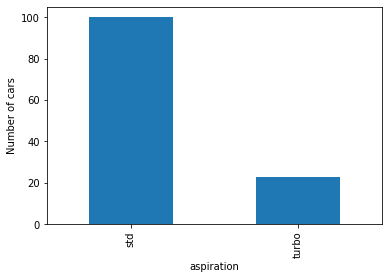

In [45]:
# let's inspect the number of observations per category in aspiration

# value_counts() counts the amount of cars that show each of the labels
# in the variable indicated below

X_train['aspiration'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('aspiration')
plt.ylabel('Number of cars')

Text(0, 0.5, 'Number of cars')

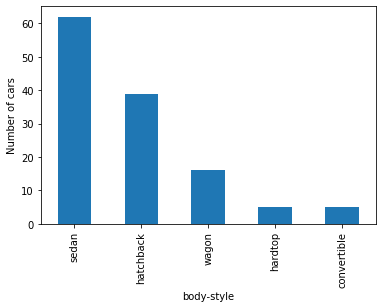

In [46]:
# let's inspect the number of observations per category in body-style

# value_counts() counts the amount of cars that show each of the labels
# in the variable indicated below

X_train['body-style'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('body-style')
plt.ylabel('Number of cars')

In [47]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['aspiration'].fillna('Missing', inplace=True)
X_test['aspiration'].fillna('Missing', inplace=True)

C:\Users\gusal\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [48]:
# Let's fill na in both train and test

# I use the fillna() method from pandas

# with the argument inplace=True, I indicate to pandas
# that I want the values replaced in the same dataset

X_train['body-style'].fillna('Missing', inplace=True)
X_test['body-style'].fillna('Missing', inplace=True)

In [49]:
# add the missing indicator for aspiration

# this is done very simply by using np.where from numpy
# and isnull from pandas:

X_train['aspiration_NA'] = np.where(X_train['aspiration'].isnull(), 1, 0)
X_test['aspiration_NA'] = np.where(X_test['aspiration'].isnull(), 1, 0)


C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [50]:
# add the missing indicator for body-style

X_train['body-style_NA'] = np.where(X_train['body-style'].isnull(), 1, 0)
X_test['body-style_NA'] = np.where(X_test['body-style'].isnull(), 1, 0)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0, 0.5, 'Number of cars')

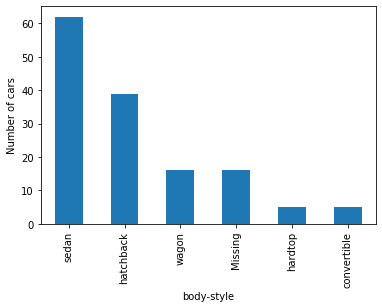

In [51]:
# let's inspect the number of observations per category in body-style

# value_counts() counts the amount of cars that show each of the labels
# in the variable indicated below

X_train['body-style'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('body-style')
plt.ylabel('Number of cars')

Text(0, 0.5, 'Number of cars')

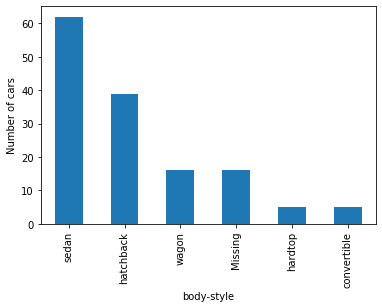

In [54]:
# let's inspect the number of observations per category in body-style

# value_counts() counts the amount of cars that show each of the labels
# in the variable indicated below

X_train['body-style'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('body-style')
plt.ylabel('Number of cars')

We see now the additional category with the missing data: Missing